In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pylab import rcParams
from PIL import Image
%matplotlib inline

In [2]:
# Load movies
movies = pd.read_csv("./data/movies.csv")
#movies = movies.replace({np.nan: None}) # replace NaN with None
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [3]:
# Load movies
links = pd.read_csv("./data/links.csv")
links = links.replace({np.nan: None}) # replace NaN with None
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862
1,2,113497,8844
2,3,113228,15602
3,4,114885,31357
4,5,113041,11862


In [4]:
# Load movies
ratings = pd.read_csv("./data/ratings.csv")
#ratings = ratings.replace({np.nan: None}) # replace NaN with None
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [5]:
# Load movies
tags = pd.read_csv("./data/tags.csv")
tags = tags.replace({np.nan: None}) # replace NaN with None
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
movies.count()

movieId    9742
title      9742
genres     9742
dtype: int64

In [7]:
links.count()

movieId    9742
imdbId     9742
tmdbId     9734
dtype: int64

In [8]:
ratings.count()

userId       100836
movieId      100836
rating       100836
timestamp    100836
dtype: int64

In [9]:
tags.count()

userId       3683
movieId      3683
tag          3683
timestamp    3683
dtype: int64

In [10]:
print("If there is missing data in each table?")
print('movie: {}'.format(movies.count() == movies.dropna().count()))
print('ratings: {}'.format(ratings.count() == ratings.dropna().count()))
print('links: {}'.format(links.count() == links.dropna().count()))
print('tags: {}'.format(tags.count() == tags.dropna().count()))

If there is missing data in each table?
movie: movieId    True
title      True
genres     True
dtype: bool
ratings: userId       True
movieId      True
rating       True
timestamp    True
dtype: bool
links: movieId    False
imdbId     False
tmdbId      True
dtype: bool
tags: userId       True
movieId      True
tag          True
timestamp    True
dtype: bool


In [11]:
#Using regular expressions to find a year stored between parentheses
#We specify the parantheses so we don't conflict with movies that have years in their titles
movies['year'] = movies.title.str.extract('(\(\d\d\d\d\))',expand=False)
#Removing the parentheses
movies['year'] = movies.year.str.extract('(\d\d\d\d)',expand=False)
#Removing the years from the 'title' column
movies['title'] = movies.title.str.replace('(\(\d\d\d\d\))', '')
#Applying the strip function to get rid of any ending whitespace characters that may have appeared
movies['title'] = movies['title'].apply(lambda x: x.strip())
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji,Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men,Comedy|Romance,1995
3,4,Waiting to Exhale,Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II,Comedy,1995
5,6,Heat,Action|Crime|Thriller,1995
6,7,Sabrina,Comedy|Romance,1995
7,8,Tom and Huck,Adventure|Children,1995
8,9,Sudden Death,Action,1995
9,10,GoldenEye,Action|Adventure|Thriller,1995


In [33]:
# Genres
all_genres = [s.split("| ") for s in movies[movies.genres.notnull()].genres]
genres = [item for l in all_genres for item in l ]
unique_genres = set(genres)
print (f"total of {len(unique_genres)} unique genres from {len(genres)} occurances.")
pd.Series(genres).value_counts().plot(kind='bar', figsize=(10, 3))
plt.title("# of movies per genre")
plt.ylabel("# of movies")
plt.xlabel("genre")
plt.show()

AttributeError: 'list' object has no attribute 'split'

Total of 106 uinque years from 1902 to 2018


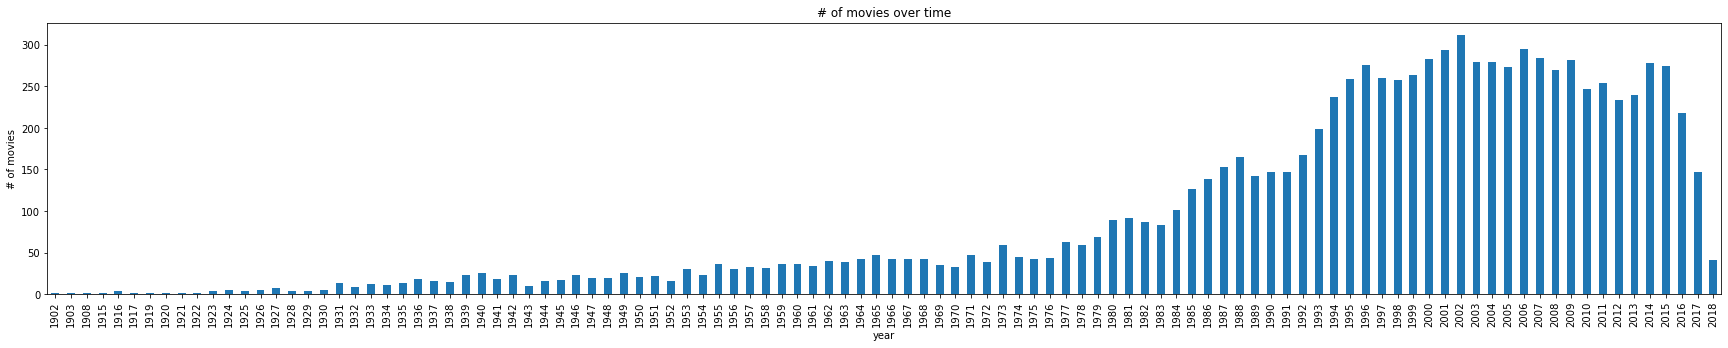

In [12]:
# Years
years = movies[movies.year.notnull()].year # get rows where year is not None
print (f"Total of {len(set(years))} uinque years from {min(years)} to {max(years)}")
pd.Series(years).value_counts().sort_index().plot(kind='bar', figsize=(30, 5))
plt.title("# of movies over time")
plt.ylabel("# of movies")
plt.xlabel("year")
plt.show()

In [13]:
#Every genre is separated by a | so we simply have to call the split function on |
movies['genres'] = movies.genres.str.split('|')
movies.head(10)

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995
5,6,Heat,"[Action, Crime, Thriller]",1995
6,7,Sabrina,"[Comedy, Romance]",1995
7,8,Tom and Huck,"[Adventure, Children]",1995
8,9,Sudden Death,[Action],1995
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995


In [14]:
#Copying the movie dataframe into a new one since we won't need to use the genre information in our first case.
moviesWithGenres = movies.copy()

#For every row in the dataframe, iterate through the list of genres and place a 1 into the corresponding column
for index, row in movies.iterrows():
    for genre in row['genres']:
        moviesWithGenres.at[index, genre] = 1
#Filling in the NaN values with 0 to show that a movie doesn't have that column's genre
moviesWithGenres = moviesWithGenres.fillna(0)
moviesWithGenres.head(10)

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995,1.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,Grumpier Old Men,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,Father of the Bride Part II,[Comedy],1995,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,6,Heat,"[Action, Crime, Thriller]",1995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,7,Sabrina,"[Comedy, Romance]",1995,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8,Tom and Huck,"[Adventure, Children]",1995,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9,Sudden Death,[Action],1995,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,10,GoldenEye,"[Action, Adventure, Thriller]",1995,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
#Drop removes a specified row or column from a dataframe
ratings = ratings.drop('timestamp', 1)
ratings.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


In [16]:
#Merge is a function that combines all the rows of the dataset with the specified dataframe.
data = ratings.merge(movies,on='movieId', how='left')
data.head(10)

,userId,movieId,rating,title,genres,year
0,1,1,4.0,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,1,3,4.0,Grumpier Old Men,"[Comedy, Romance]",1995
2,1,6,4.0,Heat,"[Action, Crime, Thriller]",1995
3,1,47,5.0,Seven (a.k.a. Se7en),"[Mystery, Thriller]",1995
4,1,50,5.0,"Usual Suspects, The","[Crime, Mystery, Thriller]",1995
5,1,70,3.0,From Dusk Till Dawn,"[Action, Comedy, Horror, Thriller]",1996
6,1,101,5.0,Bottle Rocket,"[Adventure, Comedy, Crime, Romance]",1996
7,1,110,4.0,Braveheart,"[Action, Drama, War]",1995
8,1,151,5.0,Rob Roy,"[Action, Drama, Romance, War]",1995
9,1,157,5.0,Canadian Bacon,"[Comedy, War]",1995


# Content-Based Recommendation system

In [27]:
movies.head()

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
1,2,Jumanji,"[Adventure, Children, Fantasy]",1995
2,3,Grumpier Old Men,"[Comedy, Romance]",1995
3,4,Waiting to Exhale,"[Comedy, Drama, Romance]",1995
4,5,Father of the Bride Part II,[Comedy],1995


In [30]:
movie_profile = movies[['movieId', 'title', 'genres']]
movie_profile.rename(columns={'id': 'movieId'}, inplace=True)
genres = [item.strip() for l in all_genres for item in l ]
unique_genres = set(genres)
for genre in unique_genres:
  movie_profile[genre] = 0

/Users/brianm/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


NameError: name 'all_genres' is not defined

In [42]:
userInput = [
            {'title':'Fast & Furious (Fast and the Furious 4, The)', 'rating':4},
            {'title':'Jumanji: Welcome to the Jungle', 'rating':4.5},
            {'title':'Secret Superstar', 'rating':3},
            {'title':"Captain Marvel", 'rating':3.5},
            {'title':'Intern, The', 'rating':5}
         ] 
inputMovies = pd.DataFrame(userInput)
inputMovies

,title,rating
0,"Fast & Furious (Fast and the Furious 4, The)",4.0
1,Jumanji: Welcome to the Jungle,4.5
2,Secret Superstar,3.0
3,Captain Marvel,3.5
4,"Intern, The",5.0


In [43]:
#Filtering out the movies by title
inputId = movies[movies['title'].isin(inputMovies['title'].tolist())]
#Then merging it so we can get the movieId. It's implicitly merging it by title.
inputMovies = pd.merge(inputId, inputMovies)
#Dropping information we won't use from the input dataframe
inputMovies = inputMovies.drop('genres', 1).drop('year', 1)
#Final input dataframe
#If a movie you added in above isn't here, then it might not be in the original 
#dataframe or it might spelled differently, please check capitalisation.
inputMovies

,movieId,title,rating
0,67923,"Fast & Furious (Fast and the Furious 4, The)",4.0
1,179401,Jumanji: Welcome to the Jungle,4.5


In [45]:
#Filtering out the movies from the input
userMovies = moviesWithGenres[moviesWithGenres['movieId'].isin(inputMovies['movieId'].tolist())]
userMovies

,movieId,title,genres,year,Adventure,Animation,Children,Comedy,Fantasy,Romance,...,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
7006,67923,"Fast & Furious (Fast and the Furious 4, The)","[Action, Crime, Drama, Thriller]",2009,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9636,179401,Jumanji: Welcome to the Jungle,"[Action, Adventure, Children]",2017,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [46]:
#Resetting the index to avoid future issues
userMovies = userMovies.reset_index(drop=True)
#Dropping unnecessary issues due to save memory and to avoid issues
userGenreTable = userMovies.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
userGenreTable

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
inputMovies['rating']

0    4.0
1    4.5
Name: rating, dtype: float64

In [48]:
#Dot produt to get weights
userProfile = userGenreTable.transpose().dot(inputMovies['rating'])
#The user profile
userProfile

Adventure             4.5
Animation             0.0
Children              4.5
Comedy                0.0
Fantasy               0.0
Romance               0.0
Drama                 4.0
Action                8.5
Crime                 4.0
Thriller              4.0
Horror                0.0
Mystery               0.0
Sci-Fi                0.0
War                   0.0
Musical               0.0
Documentary           0.0
IMAX                  0.0
Western               0.0
Film-Noir             0.0
(no genres listed)    0.0
dtype: float64

In [50]:
#Now let's get the genres of every movie in our original dataframe
genreTable = moviesWithGenres.set_index(moviesWithGenres['movieId'])
#And drop the unnecessary information
genreTable = genreTable.drop('movieId', 1).drop('title', 1).drop('genres', 1).drop('year', 1)
genreTable.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,War,Musical,Documentary,IMAX,Western,Film-Noir,(no genres listed)
movieId,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
genreTable.shape

(9742, 20)

In [53]:
#Multiply the genres by the weights and then take the weighted average
recommendationTable = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recommendationTable.head()

movieId
1    0.305085
2    0.305085
3    0.000000
4    0.135593
5    0.000000
dtype: float64

In [54]:
#Sort our recommendations in descending order
recommendationTable = recommendationTable.sort_values(ascending=False)
#Just a peek at the values
recommendationTable.head()

movieId
26504    0.864407
49530    0.847458
459      0.847458
6016     0.847458
81132    0.847458
dtype: float64

In [56]:
#The final recommendation table
movies.loc[movies['movieId'].isin(recommendationTable.head(20).keys())]

,movieId,title,genres,year
400,459,"Getaway, The","[Action, Adventure, Crime, Drama, Romance, Thr...",1994
1747,2344,Runaway Train,"[Action, Adventure, Drama, Thriller]",1985
1814,2414,Young Sherlock Holmes,"[Action, Adventure, Children, Fantasy, Mystery...",1985
1822,2422,"Karate Kid, Part III, The","[Action, Adventure, Children, Drama]",1989
1828,2429,Mighty Joe Young,"[Action, Adventure, Drama, Fantasy, Thriller]",1998
2623,3508,"Outlaw Josey Wales, The","[Action, Adventure, Drama, Thriller, Western]",1976
3085,4142,Left Behind: The Movie,"[Action, Adventure, Drama, Thriller]",2000
4176,6016,City of God (Cidade de Deus),"[Action, Adventure, Crime, Drama, Thriller]",2002
4409,6503,Charlie's Angels: Full Throttle,"[Action, Adventure, Comedy, Crime, Thriller]",2003
4859,7262,Catch That Kid,"[Action, Adventure, Children, Comedy, Crime]",2004


# Collaborative Filtering based Recommendation System

In [18]:
user_movie_content = pd.DataFrame(columns=[_ for _ in movies.movieId.unique()], index=[_ for _ in ratings.userId.unique()])
user_movie_content = user_movie_content.replace({np.nan: 0})

In [19]:
for i in range(ratings.shape[0]):
  user_movie_content.iloc[int(ratings.iloc[i]['userId'])-1][int(ratings.iloc[i]['movieId'])] = ratings.iloc[i]['rating']

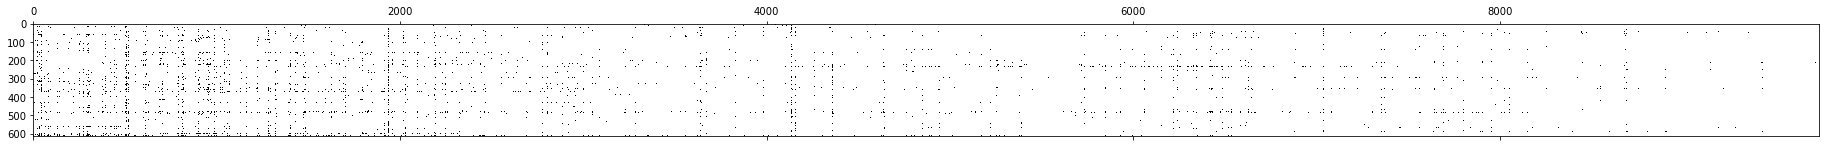

In [20]:
fig = plt.figure(figsize=(32,32))
plt.spy(user_movie_content)

In [22]:
from surprise import NormalPredictor
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

# A reader is still needed but only the rating_scale param is requiered.
reader = Reader(rating_scale=(1, 5))

# The columns must correspond to user id, item id and ratings (in that order).
data = Dataset.load_from_df(ratings[['userId', 'movieId', 'rating']], reader)

In [36]:
from surprise import SVD
from surprise import SVDpp
from surprise import KNNBasic
from surprise import NMF
from surprise import CoClustering
from surprise import SlopeOne
from surprise.model_selection import cross_validate


algo1 = SVD()
algo2 = KNNBasic()
algo3 = NMF()
algo4 = CoClustering()
algo5 = SlopeOne()

# Run 5-fold cross-validation and print results
algo1_dict = cross_validate(algo1, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo2_dict = cross_validate(algo2, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo3_dict = cross_validate(algo3, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo4_dict = cross_validate(algo4, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)
algo5_dict = cross_validate(algo5, data, measures=['RMSE', 'MAE'], cv=5, verbose=False)

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


In [48]:

def dcg_at_k(r, k, method=0):
    """Score is discounted cumulative gain (dcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> dcg_at_k(r, 1)
    3.0
    >>> dcg_at_k(r, 1, method=1)
    3.0
    >>> dcg_at_k(r, 2)
    5.0
    >>> dcg_at_k(r, 2, method=1)
    4.2618595071429155
    >>> dcg_at_k(r, 10)
    9.6051177391888114
    >>> dcg_at_k(r, 11)
    9.6051177391888114
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Discounted cumulative gain
    """
    r = np.asfarray(r)[:k]
    if r.size:
        if method == 0:
            return r[0] + np.sum(r[1:] / np.log2(np.arange(2, r.size + 1)))
        elif method == 1:
            return np.sum(r / np.log2(np.arange(2, r.size + 2)))
        else:
            raise ValueError('method must be 0 or 1.')
    return 0.


In [49]:

def ndcg_at_k(r, k, method=0):
    """Score is normalized discounted cumulative gain (ndcg)
    Relevance is positive real values.  Can use binary
    as the previous methods.
    Example from
    http://www.stanford.edu/class/cs276/handouts/EvaluationNew-handout-6-per.pdf
    >>> r = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
    >>> ndcg_at_k(r, 1)
    1.0
    >>> r = [2, 1, 2, 0]
    >>> ndcg_at_k(r, 4)
    0.9203032077642922
    >>> ndcg_at_k(r, 4, method=1)
    0.96519546960144276
    >>> ndcg_at_k([0], 1)
    0.0
    >>> ndcg_at_k([1], 2)
    1.0
    Args:
        r: Relevance scores (list or numpy) in rank order
            (first element is the first item)
        k: Number of results to consider
        method: If 0 then weights are [1.0, 1.0, 0.6309, 0.5, 0.4307, ...]
                If 1 then weights are [1.0, 0.6309, 0.5, 0.4307, ...]
    Returns:
        Normalized discounted cumulative gain
    """
    dcg_max = dcg_at_k(sorted(r, reverse=True), k, method)
    if not dcg_max:
        return 0.
    return dcg_at_k(r, k, method) / dcg_max

In [50]:

r = [1,2,3,4,5]
k =100
ndcg_at_k (r, 100, method=1)


0.7222433789799553

In [ ]:
# from math import log
# import unittest


# def dcg_at_k(scores):
#     assert scores
#     return scores[0] + sum(sc / log(ind, 2) for sc, ind in zip(scores[1:], range(2, len(scores)+1)))

# def ndcg_at_k(predicted_scores, user_scores):
#     assert len(predicted_scores) == len(user_scores)
#     idcg = dcg_at_k(sorted(user_scores, reverse=True))
#     return (dcg_at_k(predicted_scores) / idcg) if idcg > 0.0 else 0.0


# class TestMetrics(unittest.TestCase):

#     def test_dcg_small(self):
#         scores = [3, 2]
#         self.assertAlmostEqual(dcg_at_k(scores), 5.0)


#     def test_dcg_large(self):
#         scores = [3, 2, 3, 0, 0, 1, 2, 2, 3, 0]
#         self.assertAlmostEqual(dcg_at_k(scores), 9.6051177391888114)


#     def test_ndcg(self):
#         predicted1 = [.4, .1, .8]
#         predicted2 = [.0, .1, .4]
#         predicted3 = [.4, .1, .0]
#         actual = [.8, .4, .1, .0]
#         self.assertAlmostEqual(ndcg_at_k(predicted1, actual[:3]), 0.795, 3)
#         self.assertAlmostEqual(ndcg_at_k(predicted2, actual[:3]), 0.279, 3)
#         self.assertAlmostEqual(ndcg_at_k(predicted3, actual[:3]), 0.396, 3)

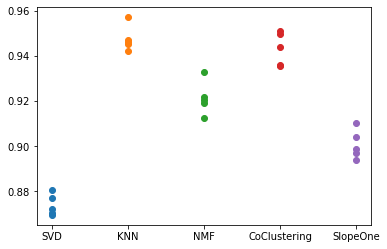

In [24]:
import matplotlib.pyplot as plt

algos = ['SVD', 'KNN', 'NMF', 'CoClustering', 'SlopeOne']
x_pos = np.arange(float(len(algos)))

Y = [algo1_dict['test_rmse'], algo2_dict['test_rmse'], algo3_dict['test_rmse'], algo4_dict['test_rmse'], algo5_dict['test_rmse']]
for y in range(len(Y)):
  plt.scatter([algos[y], algos[y], algos[y], algos[y], algos[y]], Y[y], marker='o')

In [25]:
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [26]:
trainset = data.build_full_trainset()
algo1.fit(trainset)

# Than predict ratings for all pairs (u, i) that are NOT in the training set.
testset = trainset.build_anti_testset()
predictions = algo1.test(testset)

top_n = get_top_n(predictions, n=10)

# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

1 [318, 914, 898, 1225, 1250, 1266, 2324, 750, 858, 1223]
2 [1204, 904, 527, 898, 1267, 56782, 2959, 260, 928, 1203]
3 [858, 38061, 3681, 31658, 912, 4239, 3468, 1276, 741, 4878]
4 [1204, 1272, 858, 81845, 541, 55721, 1221, 1104, 1276, 1233]
5 [912, 1262, 246, 1276, 1283, 898, 858, 1237, 1225, 1104]
6 [1204, 171763, 898, 1247, 1272, 1258, 1200, 2160, 1945, 58]
7 [858, 3030, 904, 2028, 1237, 912, 2571, 1201, 1214, 115149]
8 [858, 1080, 1252, 2959, 898, 4993, 5952, 7153, 1204, 81845]
9 [7153, 260, 1196, 318, 527, 1204, 904, 1213, 27773, 720]
10 [1225, 1204, 50, 1223, 44199, 1197, 72226, 5995, 55721, 2067]
11 [912, 1196, 260, 922, 2571, 1178, 1204, 475, 5690, 50]
12 [6, 50, 260, 457, 923, 1136, 1198, 1208, 1210, 1213]
13 [318, 750, 912, 1283, 1136, 1617, 2019, 1208, 1089, 68157]
14 [750, 2959, 4993, 1704, 7371, 1258, 1214, 3275, 58559, 858]
15 [44195, 110, 1225, 4144, 1197, 1203, 1283, 1207, 1234, 1089]
16 [44195, 1283, 1204, 2788, 1228, 48516, 3275, 2160, 1217, 1225]
17 [1204, 2324, 1235

In [57]:
#Filtering out users that have watched movies that the input has watched and storing it
userSubset = ratings[ratings['movieId'].isin(inputMovies['movieId'].tolist())]
userSubset.head()

,userId,movieId,rating
9148,62,179401,3.5
16675,105,67923,4.0
27241,184,179401,2.5
30511,212,179401,4.0
36998,249,67923,4.0


In [58]:
#Groupby creates several sub dataframes where they all have the same value in the column specified as the parameter
userSubsetGroup = userSubset.groupby(['userId'])

In [60]:
userSubsetGroup.get_group(249)

,userId,movieId,rating
36998,249,67923,4.0


In [61]:
#Sorting it so users with movie most in common with the input will have priority
userSubsetGroup = sorted(userSubsetGroup,  key=lambda x: len(x[1]), reverse=True)

In [62]:
userSubsetGroup[0:3]

[(380,
         userId  movieId  rating
  57819     380    67923     3.0
  58088     380   179401     4.0),
 (62,
        userId  movieId  rating
  9148      62   179401     3.5),
 (105,
         userId  movieId  rating
  16675     105    67923     4.0)]

In [63]:
userSubsetGroup = userSubsetGroup[0:100]

In [64]:
#Store the Pearson Correlation in a dictionary, where the key is the user Id and the value is the coefficient
pearsonCorrelationDict = {}

#For every user group in our subset
for name, group in userSubsetGroup:
    #Let's start by sorting the input and current user group so the values aren't mixed up later on
    group = group.sort_values(by='movieId')
    inputMovies = inputMovies.sort_values(by='movieId')
    #Get the N for the formula
    nRatings = len(group)
    #Get the review scores for the movies that they both have in common
    temp_df = inputMovies[inputMovies['movieId'].isin(group['movieId'].tolist())]
    #And then store them in a temporary buffer variable in a list format to facilitate future calculations
    tempRatingList = temp_df['rating'].tolist()
    #Let's also put the current user group reviews in a list format
    tempGroupList = group['rating'].tolist()
    #Now let's calculate the pearson correlation between two users, so called, x and y
    Sxx = sum([i**2 for i in tempRatingList]) - pow(sum(tempRatingList),2)/float(nRatings)
    Syy = sum([i**2 for i in tempGroupList]) - pow(sum(tempGroupList),2)/float(nRatings)
    Sxy = sum( i*j for i, j in zip(tempRatingList, tempGroupList)) - sum(tempRatingList)*sum(tempGroupList)/float(nRatings)
    
    #If the denominator is different than zero, then divide, else, 0 correlation.
    if Sxx != 0 and Syy != 0:
        val = (Sxx*Syy)**(1/2)
        pearsonCorrelationDict[name] = Sxy/(val)
    else:
        pearsonCorrelationDict[name] = 0

In [65]:
pearsonCorrelationDict.items()

dict_items([(380, 1.0), (62, 0), (105, 0), (184, 0), (212, 0), (249, 0), (305, 0), (352, 0), (365, 0), (382, 0), (414, 0), (514, 0), (534, 0), (596, 0), (610, 0)])

In [66]:
pearsonData = pd.DataFrame.from_dict(pearsonCorrelationDict, orient='index')
pearsonData.columns = ['similarityIndex']
pearsonData['userId'] = pearsonData.index
pearsonData.index = range(len(pearsonData))
pearsonData.head()

,similarityIndex,userId
0,1.0,380
1,0.0,62
2,0.0,105
3,0.0,184
4,0.0,212


In [67]:
topUsers=pearsonData.sort_values(by='similarityIndex', ascending=False)[0:50]
topUsers.head()

,similarityIndex,userId
0,1.0,380
1,0.0,62
2,0.0,105
3,0.0,184
4,0.0,212


In [69]:
topUsersRating=topUsers.merge(ratings, left_on='userId', right_on='userId', how='inner')
topUsersRating.head()

,similarityIndex,userId,movieId,rating
0,1.0,380,1,5.0
1,1.0,380,2,5.0
2,1.0,380,6,5.0
3,1.0,380,10,5.0
4,1.0,380,12,4.0


In [70]:
#Multiplies the similarity by the user's ratings
topUsersRating['weightedRating'] = topUsersRating['similarityIndex']*topUsersRating['rating']
topUsersRating.head()

,similarityIndex,userId,movieId,rating,weightedRating
0,1.0,380,1,5.0,5.0
1,1.0,380,2,5.0,5.0
2,1.0,380,6,5.0,5.0
3,1.0,380,10,5.0,5.0
4,1.0,380,12,4.0,4.0


In [71]:
#Applies a sum to the topUsers after grouping it up by userId
tempTopUsersRating = topUsersRating.groupby('movieId').sum()[['similarityIndex','weightedRating']]
tempTopUsersRating.columns = ['sum_similarityIndex','sum_weightedRating']
tempTopUsersRating.head()

,sum_similarityIndex,sum_weightedRating
movieId,,
1,1.0,5.0
2,1.0,5.0
3,0.0,0.0
5,0.0,0.0
6,1.0,5.0


In [72]:
#Creates an empty dataframe
recommendation_data = pd.DataFrame()
#Now we take the weighted average
recommendation_data['weighted average recommendation score'] = tempTopUsersRating['sum_weightedRating']/tempTopUsersRating['sum_similarityIndex']
recommendation_data['movieId'] = tempTopUsersRating.index
recommendation_data.head()

,weighted average recommendation score,movieId
movieId,,
1,5.0,1
2,5.0,2
3,NaN,3
5,NaN,5
6,5.0,6


In [74]:
recommendation = recommendation_data.sort_values(by='weighted average recommendation score', ascending=False)
recommendation.head(10)

,weighted average recommendation score,movieId
movieId,,
1,5.0,1
104913,5.0,104913
94777,5.0,94777
95149,5.0,95149
106642,5.0,106642
97913,5.0,97913
98491,5.0,98491
293,5.0,293
720,5.0,720


In [75]:
movies.loc[movies['movieId'].isin(recommendation.head(10)['movieId'].tolist())]

,movieId,title,genres,year
0,1,Toy Story,"[Adventure, Animation, Children, Comedy, Fantasy]",1995
254,293,Léon: The Professional (a.k.a. The Professiona...,"[Action, Crime, Drama, Thriller]",1994
322,364,"Lion King, The","[Adventure, Animation, Children, Drama, Musica...",1994
585,720,Wallace & Gromit: The Best of Aardman Animation,"[Adventure, Animation, Comedy]",1996
7883,94777,Men in Black III (M.III.B.) (M.I.B.³),"[Action, Comedy, Sci-Fi, IMAX]",2012
7903,95149,Superman/Batman: Public Enemies,"[Action, Animation, Fantasy]",2009
8022,97913,Wreck-It Ralph,"[Animation, Comedy]",2012
8043,98491,Paperman,"[Animation, Comedy, Romance]",2012
8258,104913,Rush,"[Action, Drama]",2013
8301,106642,"Day of the Doctor, The","[Adventure, Drama, Sci-Fi]",2013
